# The Bounce Approximation for a general static potential
On attempting to solve for a scalar field, with the potential (in Minkowski space i.e. real space), $V_{Minkowski}(\phi)$, where $\phi$ is the function for the scalar field

### {The user types in the potential $V_{Minkowski}(\phi)$}
.

A Wick Rotation was performed, taking the problem to the Euclidean space:

$V_{Euclidean}(\phi) = - V_{Minkowski}(\phi)$

And so, as adapted from a paper by Sidney Coleman in 1977, and my supervisors' work, the equation to solve becomes:

### $ \frac{d^{2}\phi}{d\rho^{2}} + \frac{(d.o.f. - 1)}{\rho}\frac{d\phi}{d\rho} + \frac{dV_{Euclidean}}{d\phi} = 0 $

where the fundamental assumptions are:

a) $\rho = \sqrt{x^2 + y^2 + z^2}$ so d.o.f. = 3 (all in Euclidean space)

b) We're ignoring time and temperature for now... so ignore inconsistencies in dimensions for now.

c) Scalar field is only a function of spatial dimensions and is radially symmetric -> $\phi(\rho)$ (this is the fundamental ansatz behind the bubble/bounce approximation, since we are assuming a phase change)

##### d) Boundary conditions are $\frac{d\phi}{d\rho} |_{\rho = 0}$ = 0;  $\phi(\rho = \infty)$ = 0

### {The user types in the range for $\phi_0$, to implement the shooting method}

### -------------------------------------------------------------------------------------------------------------------

Once we find $\phi(\rho)$, we calculate the Euclidean action:

$S_{Euclidean} = \int [\frac{1}{2}(\frac{d\phi}{d\rho})^{2} - V_{Euclidean}(\phi)]d^{3}x $

   = $ \int\int\int [\frac{1}{2}(\frac{d\phi}{d\rho})^{2} - V_{Euclidean}(\phi)]\rho^{2}sin(\theta) d\rho d\theta d\psi $

## => $S_{Euclidean}[\phi(\rho)] = 4\pi \int [\frac{1}{2}(\frac{d\phi}{d\rho})^{2} - V_{Euclidean}(\phi(\rho))]\rho^{2} d\rho $
.
---------------------------------------------------------------------------------------------------------
Note: Thin wall approximation and the "continuity approximation" I came up with (discussed later), are used in regions where solution cannot be found.

### ---------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np

In [2]:
%matplotlib nbagg

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sympy as sp
x0 = sp.Symbol('x')

In [5]:
import scipy.interpolate as sci

### Potential of the scalar field

Please enter your potential in the Minkowski space.

You can use the below templates for convenience if you'd like.

In [6]:
mu = 1
lam = 1
dA = 0.3
A = 2*mu*lam + dA

V_quar_template_1= lambda x: (mu**2)*x**4 - A*x**3 + lam*x**2

In [6]:
ht_like_4 = 1
v0 = 1
alpha = 0.6 #0.735 and 0.51 are good extreme cases

V_quar_template_2= lambda x: ht_like_4*(((3 - 4*alpha)/2)*(x/v0)**2 - (x/v0)**3  + alpha*(x/v0)**4)

In [ ]:
ht_like_4 = 1
v0 = 1
alpha = 0.5785

V_template_3= lambda x: ht_like_4*((2 - 3*alpha)*(x/v0)**2 - (x/v0)**4  + alpha*(x/v0)**6)

In [7]:
V_Minkowski= lambda x: V_quar_template_2(x)  #Please enter a dimensionless potential.

Make sure your potential is dimensionless.

See how your potential looks. Then choose upper_limit and lower_limit.

In [8]:
V= lambda x: -1*V_Minkowski(x)

In [9]:
V_pr= sp.lambdify(x0, sp.diff(V(x0), x0))

In [10]:
rts = sp.solve(V(x0), x0)
roots = []
for element in rts:
    imag = float(sp.im(element))
    real = float(sp.re(element))
    #print(type(imag))
            
    if abs(imag) <= 1e-10:
        roots.append(float(sp.re(element)))

if len(roots) == 0:
    roots.append(0)
    print("No real roots")
else:
    print(roots)
roots = np.array(roots)

[0.0, 0.3923747814892349, 1.2742918851774319]


In [11]:
crtcl_pts = sp.solve(V_pr(x0), x0)
critical_points = []
    
for element in crtcl_pts:
    imag = float(sp.im(element))
    real = float(sp.re(element))
    #print(type(imag))
            
    if abs(imag) <= 1e-10:
        critical_points.append(float(sp.re(element)))

if len(critical_points) == 0:
    critical_points.append(0)
    print("No real critical points")
else:
    print(critical_points)
critical_points = np.array(critical_points)

[0.0, 0.25, 1.0]


In [12]:
peak_troughs = list(V(critical_points))
print(peak_troughs)

[-0.0, -0.005468750000000003, 0.09999999999999998]


In [13]:
pktrrt = peak_troughs.copy()
pktrrt.append(0.0)

In [14]:
phi_localmax = critical_points[peak_troughs.index(max(peak_troughs))]
phi_localmin = critical_points[peak_troughs.index(min(peak_troughs))]

<IPython.core.display.Javascript object>


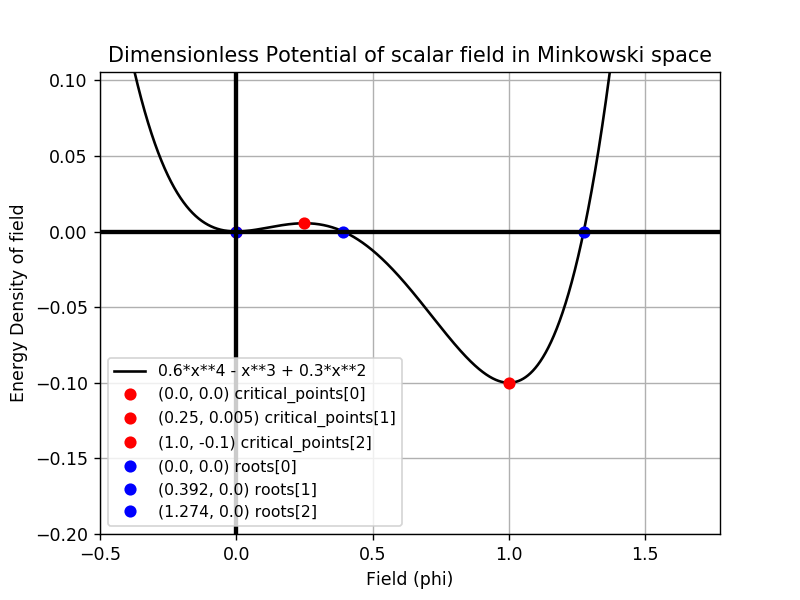

<IPython.core.display.Javascript object>


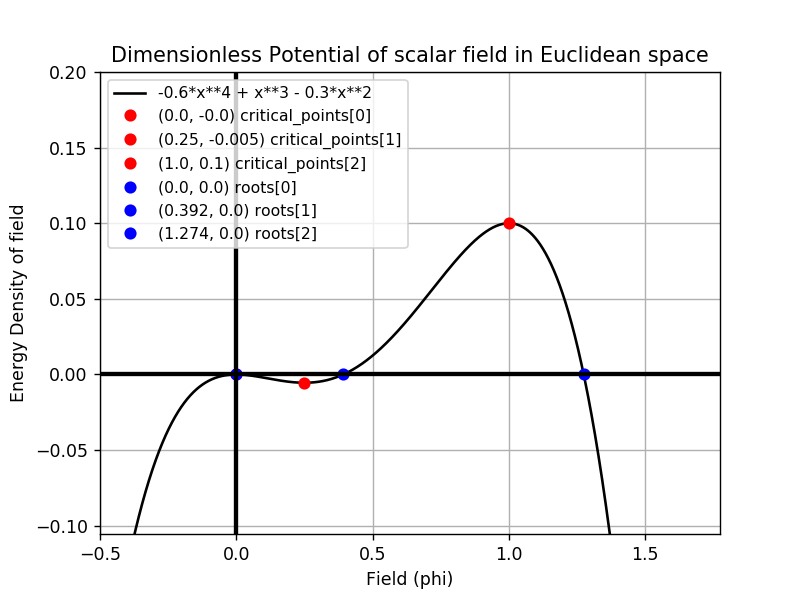

In [15]:
plt.close()

#Plotting dimensionless values
if min(roots) == max(roots):
    phi_vals = np.linspace(-0.5, 10, 10000)
else:
    phi_vals = np.linspace(min(roots) - 0.5, max(roots) + 0.5, 10000)

    
fig2 = plt.figure()
label_1 = str(V_Minkowski(x0))
plt.plot(phi_vals, V_Minkowski(phi_vals), 'k-', label= label_1)

for i in range(len(critical_points)):
    pt = str((np.round(critical_points[i], 3), np.round(-1*peak_troughs[i], 3))) + " critical_points[" + str(i) + "]"
    plt.plot(critical_points[i], -1*peak_troughs[i], 'ro', label=pt)

for j in range(len(roots)):
    pt = str((np.round(roots[j], 3), 0.0)) + " roots[" + str(j) + "]"
    if len(roots) == 1 and roots[j] == 0.0:
        plt.plot(roots[j], 0.0, 'ko', label=pt)
    else:
        plt.plot(roots[j], 0.0, 'bo', label=pt)

plt.plot([0, 0], [-1*min(pktrrt) + 0.1, -1*max(pktrrt) - 0.1], 'k-', linewidth=2.5)
plt.plot([-0.5 + min(min(roots), min(critical_points)), max(max(roots), max(critical_points)) + 0.5], [0, 0], 'k-', linewidth=2.5)
plt.ylim(-1*max(pktrrt) - 0.1, -1*min(pktrrt) + 0.1)
plt.xlim(-0.5 + min(min(roots), min(critical_points)), max(max(roots), max(critical_points)) + 0.5)
plt.xlabel("Field (phi)")
plt.ylabel("Energy Density of field")
plt.title("Dimensionless Potential of scalar field in Minkowski space")
plt.legend(fontsize= 9)
plt.grid()


fig1 = plt.figure()
label_0 = str(V(x0))
plt.plot(phi_vals, V(phi_vals), 'k-', label= label_0)

for i in range(len(critical_points)):
    pt = str((np.round(critical_points[i], 3), np.round(peak_troughs[i], 3))) + " critical_points[" + str(i) + "]"
    plt.plot(critical_points[i], peak_troughs[i], 'ro', label=pt)

for j in range(len(roots)):
    pt = str((np.round(roots[j], 3), 0.0)) + " roots[" + str(j) + "]"
    if len(roots) == 1 and roots[j] == 0.0:
        plt.plot(roots[j], 0.0, 'ko', label=pt)
    else:
        plt.plot(roots[j], 0.0, 'bo', label=pt)

plt.plot([0, 0], [min(pktrrt) - 0.1, max(pktrrt) + 0.1], 'k-', linewidth=2.5)
plt.plot([-0.5 + min(min(roots), min(critical_points)), max(max(roots), max(critical_points)) + 0.5], [0, 0], 'k-', linewidth=2.5)
plt.ylim(min(pktrrt) - 0.1, max(pktrrt) + 0.1)
plt.xlim(-0.5 + min(min(roots), min(critical_points)), max(max(roots), max(critical_points)) + 0.5)
plt.xlabel("Field (phi)")
plt.ylabel("Energy Density of field")
plt.title("Dimensionless Potential of scalar field in Euclidean space")
plt.legend(fontsize= 9)
plt.grid()

In [16]:
plt.close()
plt.close()

### Solving the equation

In [17]:
'''
#Default values for limits of bissection search:

lower = roots[1] #(the first zero)
upper = critical_points[2] #(the first peak)

#If you want to pick them yourself, refer graph and choose from roots and critical_points
'''
lower_limit = roots[1]
upper_limit = critical_points[2]

In [18]:
rho_lim_start = 16 #dimensionless; this our first guess for a good "infinity".

In [19]:
dr = 1e-3 #dimensionless; this is our precision of integration -> do not change!

In [20]:
kck = 0 #initial phi_prime_0 value; expected to be 0; set this to 1e-3 for overshooting solution.

In [21]:
dydt = lambda t, y, v: v
dvdt = lambda t, y, v: (-2*v/t) - V_pr(y)    #takes in dimensionless y, v, t and returns respective dimensionless value

In [22]:
def differentiator(fn, t, yv): #inputs all dimensionless... outputs all dimensionless...
    '''
    Solves 2nd order ODE y" + p(t)y' + q(t)y = r(y, t)
    written as a coupled system of 2 ODE.
    Uses the Stage-4 Runge-Kutta method.
    
    MUST BE USED ITERATIVELY.
    
    This method takes in:
    
    an array of variables 'yv', where:
    y = yv[0]
    v = yv[1] = y'
    
    And
    an array of functions 'fn', where:
    
    y' = dydt = fn[0] = v
    y" = dvdt = fn[1] = v'
    '''
    dt = dr
    
    yr = yv[0]
    vr = yv[1]

    fn1 = fn[0] #dy/dt
    fn2 = fn[1] #dv/dt
    
    c1 = fn1(t, yr, vr)
    l1 = fn2(t, yr, vr)
    
    c2 = fn1(t + (dt/2), yr + (c1/2)*dt, vr + (l1/2)*dt)
    l2 = fn2(t + (dt/2), yr + (c1/2)*dt, vr + (l1/2)*dt)
    
    c3 = fn1(t + (dt/2), yr + (c2/2)*dt, vr + (l2/2)*dt)
    l3 = fn2(t + (dt/2), yr + (c2/2)*dt, vr + (l2/2)*dt)
    
    c4 = fn1(t + dt, yr + c3*dt, vr + l3*dt)
    l4 = fn2(t + dt, yr + c3*dt, vr + l3*dt)
    
    y_runge = yr + (c1 + 2*c2 + 2*c3 + c4)*dt/6
    v_runge = vr + (l1 + 2*l2 + 2*l3 + l4)*dt/6    
    
    return y_runge, v_runge

In [23]:
def shooting_solver(ini, intlim= int(rho_lim_start/dr), kick=kck):
    '''
    Takes in a dimensionless initial value of phi, 
    and returns dimensionless solution to ode
    '''
    r0 = 0 #Just a little above 0, so as to avoid singularity; dimensionless
    p0 = ini #dimensionless
    p_pr_0 = -1*kick #dimensionless
    
    rho_array = []
    phi_array = []
    phi_pr_array = []
    
    rho_array.append(r0)
    phi_array.append(p0)
    phi_pr_array.append(p_pr_0)
    
    for i in range(1, intlim):
        rho_array.append(rho_array[i-1] + dr)
        
        xr, vr = differentiator([dydt, dvdt], rho_array[i], [phi_array[i-1], phi_pr_array[i-1]])
        
        phi_array.append(xr)
        phi_pr_array.append(vr)
        
        if abs(xr) > 1e4:
            break
    
    rho_array = np.array(rho_array)
    phi_array = np.array(phi_array) 
    phi_pr_array = np.array(phi_pr_array)
    
    return rho_array, phi_array, phi_pr_array

#### Bissection search

In [24]:
lower = lower_limit
upper = upper_limit
initial_value = (lower + upper)/2
k = shooting_solver(initial_value)
original = initial_value
arg = k[1][-1]

while abs(arg) > 1e-4:
    if arg > 0:
        lower = initial_value
        initial_value = (lower + upper)/2 
        k = shooting_solver(initial_value)
        arg = k[1][-1]
        if abs(original - initial_value) < 1e-10: #i.e. if it gets stuck at a value
            print("There seems to be a glitch here.")
            break
        original = initial_value
        
    else:
        upper = initial_value
        initial_value = (lower + upper)/2
        k = shooting_solver(initial_value)
        arg = k[1][-1]
        if abs(original - initial_value) < 1e-10: #i.e. if it gets stuck at a value
            print("There seems to be a glitch here.")
            break
        original = initial_value

In [25]:
print(k[1][-1], k[2][-1], initial_value) #Phi(rho) and d(phi)/d(rho) at rho = infinity, should be = 0

-4.3821970613273e-05 -5.2541531757110774e-05 0.8670645991538234


In [26]:
def infinity_pick(k, r_l_s=rho_lim_start, counter=0, quick=False, c_limit=3, case=False, kick=kck):
    '''
    Returns a good infinity that is scaled to the fall-width.
    (unless you want it done quickly, in which case, it just returns a good infinity)
    Also returns radius of bubble and the relevant part of the complete solution (k_short)
        
    It is intended for the user to be able to change the parameters 'quick'
    (and 'c_limit' and 'kick', if need be)
    The rest of the parameters are for the function to call itself effectively.
    
    When user types in:
    
    infinity_pick(k, quick=True)
    
    it is assumed that the user is in a hurry and is not interested in finding an 
    infinity that is scaled to the fall width. Radius of bubble (i.e. fall-width)
    is returned regardless.
    
    
    When user types in:
    
    infinity_pick(k, c_limit=4)
    
    it means that the code will loop itself 4 times before giving up (if it doesn't find and answer)
    The code attempts to find out if the instanton solution settles at 0, offshoots or oscillates.
    If it doesn't get a conculsion the first time, it doubles the range of infinity and tries again (by looping once).
    Usually, within 3 such jumps, the solution has already shown its behaviour. Hence c_limit defaults to 3.
    Note that, if c_limit is n, and an excigency case, like the one described above, happens,
    the range the solver has to solve is 2^n times rho_lim.
    Since dr is a definite number, this increases computation time exponentially.
    Hence choosing small c_limit value is advised.
    
    When user types in:
    
    infinity_pick(k, kick=0.00001)
    
    it means that initial conditions phi_prime_0 = -0.00001.
    Default assumes phi_prime_0 = 0.

    ''' 
    l = lower_limit
    u = upper_limit
    inv_last = initial_value
    
    if min(abs(k[1])) < 1e-3: #meaning, if your starting value wasn't bad i.e. it reached near zero at some point atleast.
        find_2nd_index = list(abs(k[1])).index(min(abs(k[1]))) #finds place where phi = 0, so as to cut of the solution there.
        find_index = list(abs(k[1][:find_2nd_index] - 0.1*1)).index(min(abs(k[1][:find_2nd_index] - 0.1*1)))
        scale = k[0][find_index]
        rho_lim = 3*scale #we want infinity scaled to fall-width
        integlim = int(rho_lim/dr)
        
        if quick:
            print("Good enough!")
            
            if k[1][-1] < -0.01:
                print("Your solution is offshooting")
                       
                shortened_rho = k[0][:find_2nd_index]
                shortened_phi = k[1][:find_2nd_index]                    
                shortened_phi_pr = k[2][:find_2nd_index]
        
                k_short = np.array((shortened_rho, shortened_phi, shortened_phi_pr))
        
            elif k[1][-1] > 0.01:
                print("Your solution is oscillating, but it is good enough")
                
                shortened_rho = k[0][:find_2nd_index]
                shortened_phi = k[1][:find_2nd_index]
                shortened_phi_pr = k[2][:find_2nd_index]
        
                k_short = np.array((shortened_rho, shortened_phi, shortened_phi_pr))
        
            else:
                print("End search!")
                k_short = k
            
            return k, case, k_short
        
        i_v = (l + u)/2
        k = shooting_solver(i_v, integlim, kick)
        original = i_v
        arg = k[1][-1]
    
        while abs(arg) > 1e-4:
            if arg > 0:
                l = i_v
                i_v = (l + u)/2 
                k = shooting_solver(i_v, integlim, kick)
                arg = k[1][-1]
                if abs(original - i_v) < 1e-10: #i.e. if it gets stuck at a value
                    print("There seems to be a glitch here.")
                    break
                original = i_v
            
            else:
                u = i_v
                i_v = (l + u)/2
                k = shooting_solver(i_v, integlim, kick)
                arg = k[1][-1]
                if abs(original - i_v) < 1e-10:
                    print("There seems to be a glitch here.")
                    break
                original = i_v
        
        if k[1][-1] < -0.01:                
            print("Your solution is offshooting")
            find_2nd_index = list(abs(k[1])).index(min(abs(k[1])))
        
            shortened_rho = k[0][:find_2nd_index]
            shortened_phi = k[1][:find_2nd_index]                    
            shortened_phi_pr = k[2][:find_2nd_index]
                        
            k_short = np.array((shortened_rho, shortened_phi, shortened_phi_pr))
                       
        elif k[1][-1] > 0.01:
            print("Your solution is oscillating, but it is good enough")
            find_2nd_index = list(abs(k[1])).index(min(abs(k[1])))
        
            shortened_rho = k[0][:find_2nd_index]
            shortened_phi = k[1][:find_2nd_index]
            shortened_phi_pr = k[2][:find_2nd_index]
    
            k_short = np.array((shortened_rho, shortened_phi, shortened_phi_pr))
    
        else:
            print("End search!")
            k_short = k
        
        return k, case, k_short
    
    
    
    else:
        counter += 1
        
        if k[1][-1] > min(k[1]):
            print("Your solution is oscillating")
            case = True
            find_2nd_index = list(abs(k[1])).index(min(abs(k[1])))
        
            shortened_rho = k[0][:find_2nd_index]
            shortened_phi = k[1][:find_2nd_index]
            shortened_phi_pr = k[2][:find_2nd_index]
    
            k_short = np.array((shortened_rho, shortened_phi, shortened_phi_pr))
            
            return k, case, k_short
        
        if counter > c_limit:
            print("Giving up")
            case = True
            find_2nd_index = list(abs(k[1])).index(min(abs(k[1])))
            
            shortened_rho = k[0][:find_2nd_index]
            shortened_phi = k[1][:find_2nd_index]
            shortened_phi_pr = k[2][:find_2nd_index]
            
            k_short = np.array((shortened_rho, shortened_phi, shortened_phi_pr))
            
            return k, case, k_short
        
        rho_lim = 2*r_l_s
        r_l_s = rho_lim
        integlim = int(rho_lim/dr)
        
        i_v = (l + u)/2
        k = shooting_solver(i_v, integlim, kick)
        original = i_v
        arg = k[1][-1]
    
        while abs(arg) > 1e-4:
            if arg > 0:
                l = i_v
                i_v = (l + u)/2 
                k = shooting_solver(i_v, integlim, kick)
                arg = k[1][-1]
                if abs(original - i_v) < 1e-10:
                    print("There seems to be a glitch here.")
                    break
                original = i_v
            
            else:
                u = i_v
                i_v = (l + u)/2
                k = shooting_solver(i_v, integlim, kick)
                arg = k[1][-1]
                if abs(original - i_v) < 1e-10:
                    print("There seems to be a glitch here.")
                    break
                original = i_v
        print("Still searching")
        print(k[1][-1], k[2][-1], i_v)
        print()
            
        return infinity_pick(k, r_l_s, counter, quick, c_limit, case, kick)

In [27]:
k, case, k_short = infinity_pick(k, kick=kck)

End search!


### Plotting the solutions

<IPython.core.display.Javascript object>


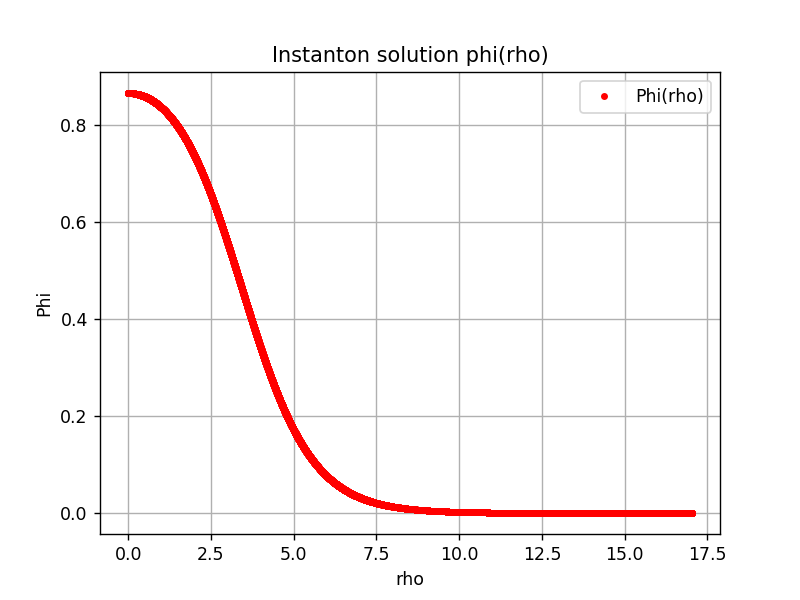

In [28]:
plt.close()
plt.plot(k[0], k[1], 'r.', label= "Phi(rho)")
plt.title("Instanton solution phi(rho)")
plt.ylabel("Phi")
plt.xlabel("rho")
plt.legend()
plt.grid()

In [29]:
plt.close()

In [30]:
print(case)

False


<IPython.core.display.Javascript object>


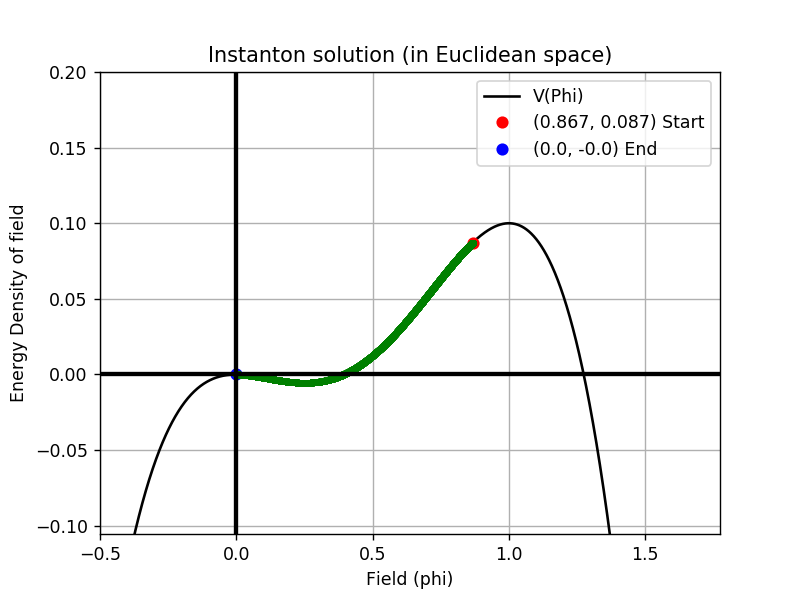

In [31]:
plt.close()

#Plotting dimensionless values

phi_vals = np.linspace(-0.5, 10, 10000)
plt.plot(phi_vals, V(phi_vals), 'k-', label= "V(Phi)")
point1 = str((np.round(k[1][0], 3), np.round(V(k[1][0]), 3))) + " Start"
plt.plot(k[1][0], V(k[1][0]), 'ro', label= point1)
point2 = str((np.round(k[1][-1], 3), np.round(V(k[1][-1]), 3))) + " End"
plt.plot(k[1][-1], V(k[1][-1]), 'bo', label= point2)
plt.plot(k[1], V(k[1]), 'g.')
plt.plot([0, 0], [min(pktrrt) - 0.1, max(pktrrt) + 0.1], 'k-', linewidth=2.5)
plt.plot([-0.5 + min(roots[0], critical_points[0]), max(roots[-1], critical_points[-1]) + 0.5], [0, 0], 'k-', linewidth=2.5)
plt.ylim(min(pktrrt) - 0.1, max(pktrrt) + 0.1)
plt.xlim(-0.5 + min(roots[0], critical_points[0]), max(roots[-1], critical_points[-1]) + 0.5)
plt.xlabel("Field (phi)")
plt.ylabel("Energy Density of field")
plt.title("Instanton solution (in Euclidean space)")
plt.legend()
plt.grid()

In [32]:
plt.close()

In [33]:
def function_integrator(fn, x_values):
    '''
    Takes function array (i.e. array of "y values"), 
    and integrates it from a to b; a, b > 0 (rectangluar integration)
    '''
    n = len(fn)
    #a = []
    area = 0
    #a.append(area)
    for i in range(1, n):
        area += (x_values[i] - x_values[i - 1])*(fn[i] + fn[i - 1])/2
        #a.append(area)
    return area#,np.array(a)

We have gotten $\phi(\rho)$, but as discrete points. To find radius of bubble (and also quantitatively see how the solution "falls") more precisely, it is helpful to "connect the discrete points" i.e. use an interpolation. Here I have used 1D interpolation, instead of Pchip Interpolation, as I do not have the FULL possible range of solution and do not want to make any more guess about the solution than we have to. This does slightly reduce the accuracy of where $\rho = R$, but not by much.

In [34]:
inverse_function = sci.interp1d(k_short[1], k_short[0])
bubble_radius = inverse_function(max(0.1*k_short[1][0], min(k_short[1])))
if max(0.1*k[1][0], min(k[1])) == min(k[1]):
    print("Yikes")
rad10 = inverse_function(0.9*k_short[1][0])

<IPython.core.display.Javascript object>


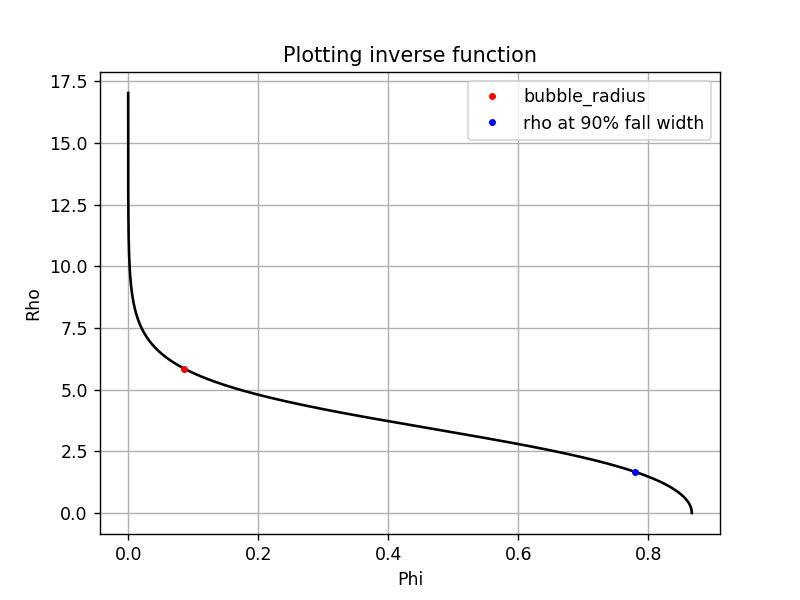

In [35]:
plt.close()

#Plotting dimensionless values

phi_vals = np.linspace(k_short[1][0], k_short[1][-1], 10000)
plt.plot(phi_vals, inverse_function(phi_vals), 'k-')
plt.plot(0.1*k_short[1][0], bubble_radius, 'r.', label= 'bubble_radius')
plt.plot(0.9*k_short[1][0], rad10, 'b.', label= 'rho at 90% fall width')
plt.xlabel("Phi")
plt.ylabel("Rho")
plt.title("Plotting inverse function")
plt.legend()
plt.grid()

In [36]:
plt.close()

<IPython.core.display.Javascript object>


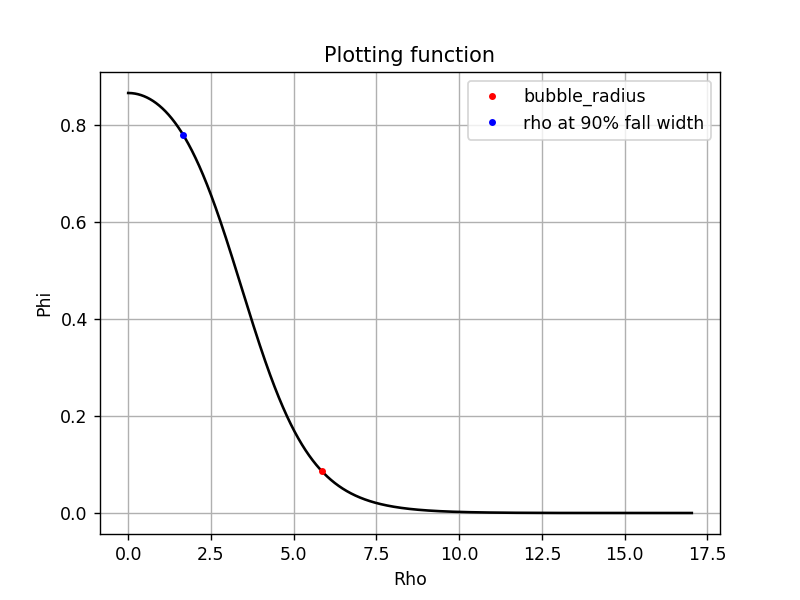

In [37]:
plt.close()

#Plotting dimensionless values

phi_vals = np.linspace(k_short[1][0], k_short[1][-1], 10000)
plt.plot(inverse_function(phi_vals), phi_vals, 'k-')
plt.plot(bubble_radius, 0.1*k_short[1][0], 'r.', label= 'bubble_radius')
plt.plot(rad10, 0.9*k_short[1][0], 'b.', label= 'rho at 90% fall width')
plt.xlabel("Rho")
plt.ylabel("Phi")
plt.title("Plotting function")
plt.legend()
plt.grid()

In [38]:
plt.close()

In [39]:
if case:
    #this is trying to mirror the conditions of the quartic potential (for thin wall approx.), but for a general 
    #potential. Hence, we are using size of the peak as a substitute for the alpha parameter, and hope that it works
    #the same way for all potentials with peaks of th same size.
    #Refer Var_Quar_Pot_Act.
    if V(upper_limit) < 0.6:
        new_phi_vals = np.linspace(0, lower_limit-0.00001, int((lower_limit-0.00001)/dr) + 1)
        S1 = function_integrator(np.sqrt(2*V_Minkowski(new_phi_vals)), new_phi_vals)
        
        bubble_radius = 2*S1/V(upper_limit)
        
        S = 4*np.pi*(bubble_radius**(2))*S1 - 4*np.pi*V(upper_limit)*(bubble_radius**3)/3
        
        print("Bubble radius = ", bubble_radius)
        print("S_thin_wall_approx = ", S) 
    
    elif V(upper_limit) <= 0.13 and V(upper_limit) >= 0.6:
        print("Linearization/curve fit region")
    
    else:
        S_integrand = (0.5*(k_short[2])**2 - V(k_short[1]))*k_short[0]*k_short[0]
    
        new_phi_vals = np.linspace(0, k_short[1][-1], int(k_short[1][-1]/dr) + 1)
    
        print("S_integrand[-1] = ", S_integrand[-1])
        print()
    
        S = 4*np.pi*function_integrator(S_integrand, k_short[0]) + 4*np.pi*(bubble_radius**2)*function_integrator(np.sqrt(2*V_Minkowski(new_phi_vals)), new_phi_vals)
        print("S_approx = ", S) 
        #Should be very positive, so that it remains in Classical regime where S >> h_bar; h_bar set to 1

else:
    S_integrand = (0.5*(k_short[2])**2 - V(k_short[1]))*k_short[0]*k_short[0]
    
    print("S_integrand[-1] = ", S_integrand[-1])
    #Should be near 0, because rho = infinity is the last point... where both d(phi)/d(rho) and phi are 0
    print()
    S = 4*np.pi*function_integrator(S_integrand, k_short[0])
    print("S = ", S) 
    #Should be very positive, so that it remains in Classical regime where S >> h_bar; h_bar set to 1

S_integrand[-1] =  1.0108997520056373e-06

S =  7.486940357877916
